In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# xem các bản có trong database

conn = sqlite3.connect('database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
# tạo các bảng dữ liệu
countries = pd.read_sql("""SELECT * FROM Country""", conn)
Player = pd.read_sql("""SELECT * FROM Player""", conn)
Match = pd.read_sql("""SELECT * FROM Match""", conn)
League = pd.read_sql("""SELECT * FROM League""", conn)
Team = pd.read_sql("""SELECT * FROM Team""", conn)
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes""", conn)
Team_Attributes = pd.read_sql("""SELECT * FROM Team_Attributes""", conn)

In [4]:
print('countries',countries.columns)
print('Player',Player.columns)
print('Match',Match.columns)
print('League',League.columns)
print('Team',Team.columns)
print('Player_Attributes',Player_Attributes.columns)
print('Team_Attributes',Team_Attributes.columns)

countries Index(['id', 'name'], dtype='object')
Player Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')
Match Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)
League Index(['id', 'country_id', 'name'], dtype='object')
Team Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')
Player_Attributes Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'ac

# Check dữ liệu ở các bảng

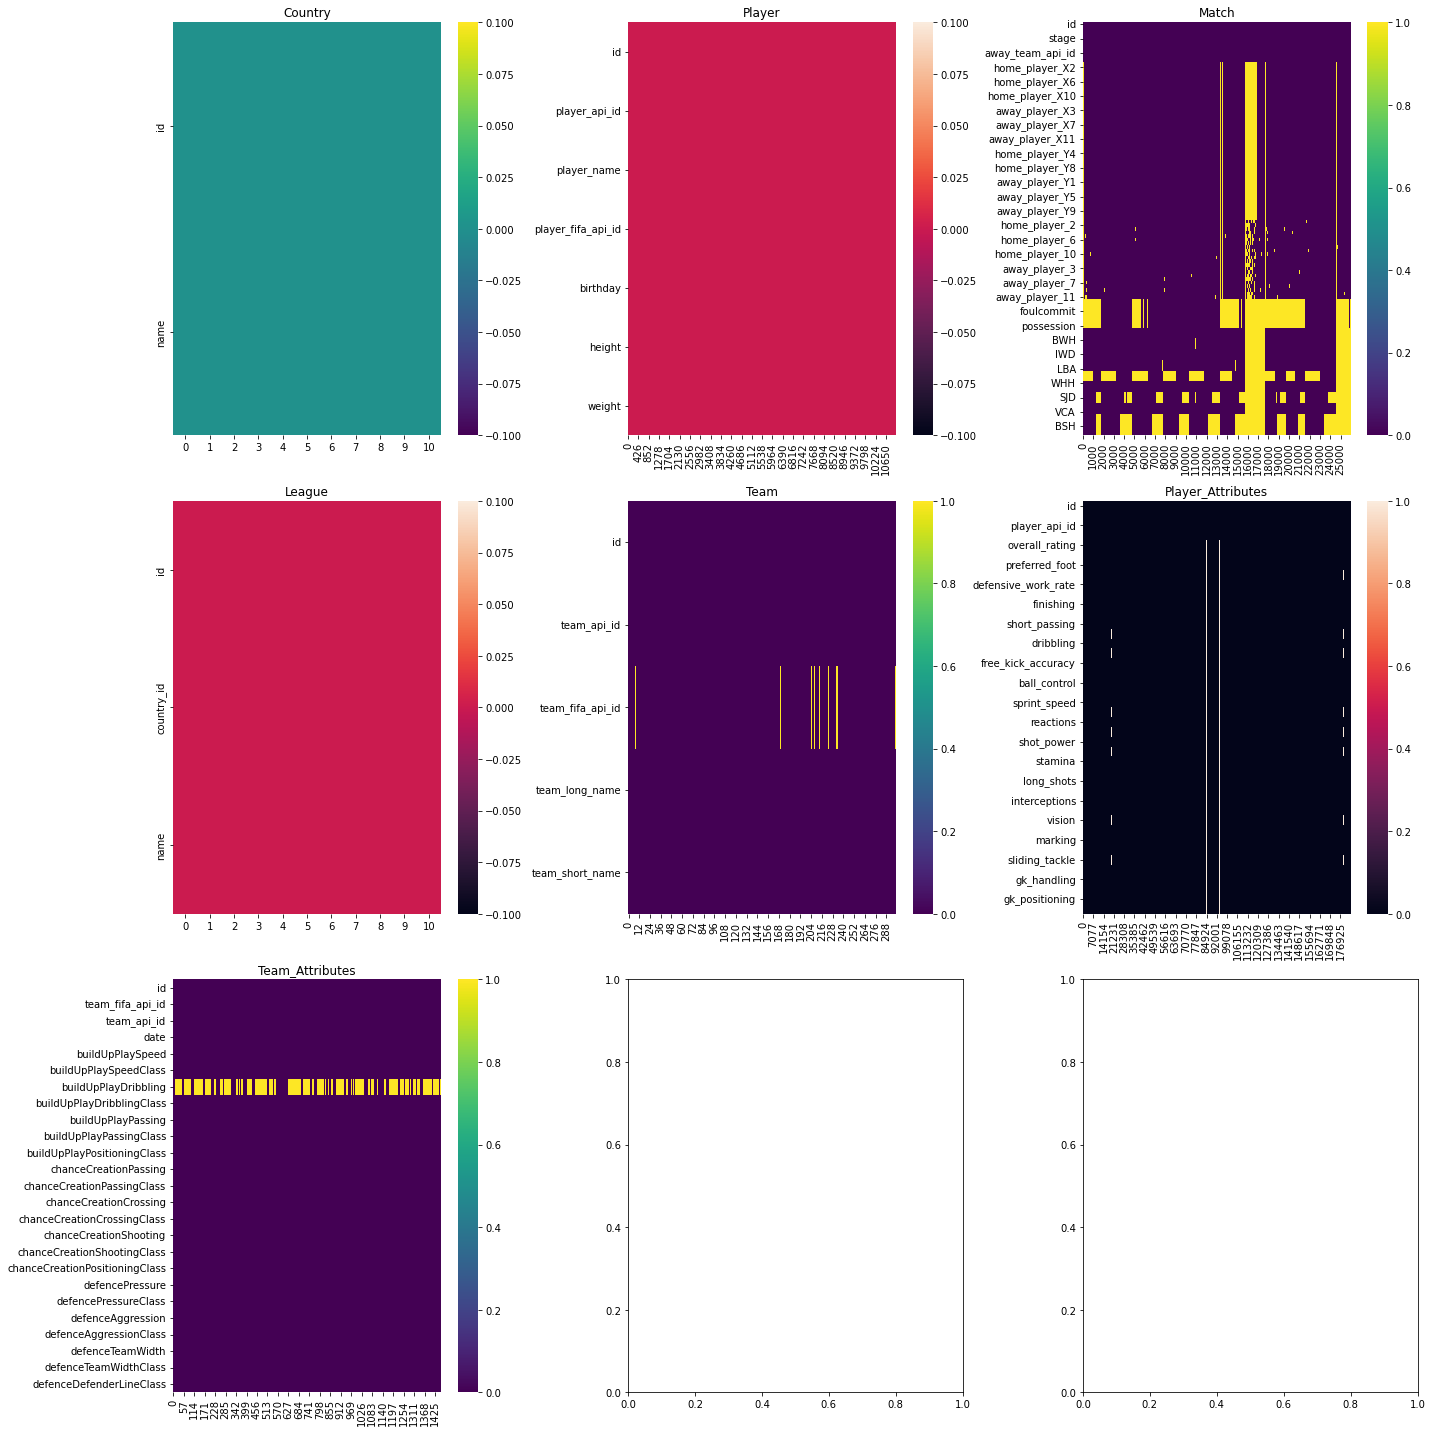

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(20,20))

sns.heatmap(countries.isna().transpose(), ax=ax1, cmap='viridis')
sns.heatmap(Player.isna().transpose(),ax=ax2, cmap='rocket')
sns.heatmap(Match.isna().transpose(), ax=ax3, cmap='viridis')
sns.heatmap(League.isna().transpose(),ax=ax4, cmap='rocket')
sns.heatmap(Team.isna().transpose(), ax=ax5, cmap='viridis')
sns.heatmap(Player_Attributes.isna().transpose(),ax=ax6, cmap='rocket')
sns.heatmap(Team_Attributes.isna().transpose(), ax=ax7, cmap='viridis')

ax1.set_title('Country')
ax2.set_title('Player')
ax3.set_title('Match')
ax4.set_title('League')
ax5.set_title('Team')
ax6.set_title('Player_Attributes')
ax7.set_title('Team_Attributes')

fig.tight_layout() # cân bằng kích thước của các axes để không bị chồng lên nhau
plt.show()

### theo biểu đồ có thể thấy data Match có số lượng null nhiều nhất vì vậy cần kiểm tra là bảng này

In [6]:
pd.set_option('display.max_columns', None) # hiển thị tất cả các cột trong dataframe

In [29]:
Match.to_excel('Match.xlsx')

In [32]:
Match[1728:1729]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,24157.0,30829.0,24224.0,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.0,1.3,4.75,8.25,1.3,4.4,8.5,1.25,4.5,10.0,NaN,NaN,NaN,1.25,4.5,10.0,1.25,5.0,10.0,1.28,5.5,12.0,1.3,4.75,10.0,1.29,4.5,11.0


In [7]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
Match.shape

(25979, 115)

In [9]:
Match.duplicated().sum() # tìm ra số lượng bản ghi trùng lặp

0

In [10]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [11]:
Match.isnull().sum() # tìm ra số lượng các giá trị null trong các cột

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [12]:
Match.isnull().describe() # tìm ra số lượng bản ghi null trong các cột

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979
unique,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,24158,24158,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24146,24146,24140,24158,24158,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24146,24146,24140,24755,24664,24698,24656,24663,24654,24752,24670,24706,24543,24424,24745,24701,24686,24658,24644,24666,24744,24638,24651,24538,24425,14217,14217,14217,14217,14217,14217,14217,14217,22592,22592,22592,22575,22575,22575,22520,22520,22520,22556,22556,22556,14811,14811,14811,22571,22571,22571,17097,17097,17097,22568,22568,22568,14162,14162,14162,14161,14161,14161


In [13]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [14]:
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


## Tính top player
### Tìm top 10 players theo cuối năm (mùa giải năm)
## Dự tính các bước tìm top 10 players theo từng năm:

### Gộp bảng dữ liệu player với player_attributes
### Lọc cầu thủ theo năm
### Check update cuối cùng của mùa
### Sắp sếp cầu thủ theo cột overall_rating, nếu overall_rating giống nhau thì sắp sếp theo cột potential
### Trả về kết quả top 10 giá trị cao nhất

In [15]:
# tạo bảng dữ liệu cần để tính top 10 cầu thủ có điểm cao nhất
df_player_attributes = pd.merge(Player[['player_api_id','player_name','height','weight']], Player_Attributes[['player_api_id','date','overall_rating','potential']], on='player_api_id')
df_player_attributes.head()

,player_api_id,player_name,height,weight,date,overall_rating,potential
0,505942,Aaron Appindangoye,182.88,187,2016-02-18 00:00:00,67.0,71.0
1,505942,Aaron Appindangoye,182.88,187,2015-11-19 00:00:00,67.0,71.0
2,505942,Aaron Appindangoye,182.88,187,2015-09-21 00:00:00,62.0,66.0
3,505942,Aaron Appindangoye,182.88,187,2015-03-20 00:00:00,61.0,65.0
4,505942,Aaron Appindangoye,182.88,187,2007-02-22 00:00:00,61.0,65.0


In [16]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   player_name     183978 non-null  object 
 2   height          183978 non-null  float64
 3   weight          183978 non-null  int64  
 4   date            183978 non-null  object 
 5   overall_rating  183142 non-null  float64
 6   potential       183142 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 11.2+ MB


In [17]:
df_player_attributes['date']=pd.to_datetime(df_player_attributes['date']) # chuyển đổi dữ liệu date thành kiểu datetime

In [18]:
df_player_attributes[df_player_attributes['overall_rating'].isnull()]

,player_api_id,player_name,height,weight,date,overall_rating,potential
483,31684,Abdeslam Ouaddou,190.50,181,2007-02-22,NaN,NaN
983,29904,Abel Gomez,182.88,165,2007-02-22,NaN,NaN
1752,24159,Adam Johnson,175.26,139,2007-02-22,NaN,NaN
2089,31916,Adam Rooney,177.80,172,2007-02-22,NaN,NaN
2482,37249,Adil Chihi,182.88,172,2007-02-22,NaN,NaN
...,...,...,...,...,...,...,...
182587,25538,Youssouf Hadji,182.88,172,2007-02-22,NaN,NaN
183249,32633,Zbigniew Malkowski,187.96,181,2007-02-22,NaN,NaN
183309,33823,Zdenek Pospech,175.26,159,2007-02-22,NaN,NaN
183361,25772,Zdravko Kuzmanovic,185.42,176,2007-02-22,NaN,NaN


In [19]:
# Giã xử trường hợp này các cầu thủ không thi đấu trong ngày đó dẫ đến không có điểm overall_rating lẫn potential. Nên ta tạm loại bỏ những điểm null này để làm sạch dữ liệu
df_player_attributes=df_player_attributes[df_player_attributes['overall_rating'].notnull()]
df_player_attributes

,player_api_id,player_name,height,weight,date,overall_rating,potential
0,505942,Aaron Appindangoye,182.88,187,2016-02-18,67.0,71.0
1,505942,Aaron Appindangoye,182.88,187,2015-11-19,67.0,71.0
2,505942,Aaron Appindangoye,182.88,187,2015-09-21,62.0,66.0
3,505942,Aaron Appindangoye,182.88,187,2015-03-20,61.0,65.0
4,505942,Aaron Appindangoye,182.88,187,2007-02-22,61.0,65.0
...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,180.34,176,2009-08-30,83.0,85.0
183974,39902,Zvjezdan Misimovic,180.34,176,2009-02-22,78.0,80.0
183975,39902,Zvjezdan Misimovic,180.34,176,2008-08-30,77.0,80.0
183976,39902,Zvjezdan Misimovic,180.34,176,2007-08-30,78.0,81.0


In [20]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_api_id   183142 non-null  int64         
 1   player_name     183142 non-null  object        
 2   height          183142 non-null  float64       
 3   weight          183142 non-null  int64         
 4   date            183142 non-null  datetime64[ns]
 5   overall_rating  183142 non-null  float64       
 6   potential       183142 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 11.2+ MB


In [21]:
def topPlayer(df,year,n=10):
    dfTop=df[df['date'].dt.year==year]
    dfTop=dfTop.sort_values('date').groupby('player_api_id').last()
    dfTop=dfTop.sort_values(['overall_rating','potential']).tail(n)
    dfTop=dfTop.sort_values(['overall_rating','potential'],ascending=False)
    dfTop=dfTop[['player_name']]
    dfTop.reset_index(level=0,inplace=True)
    dfTop.index = range(1,len(dfTop.index)+1)
    dfTop.reset_index(level=0,inplace=True)    
    return dfTop

Kiểm tra công thức

In [22]:
df=topPlayer(df_player_attributes,2007)
df.rename(columns={'index':'rank2007'},inplace=True)
df=df[['player_api_id','player_name','rank2007']]
df_rank=df[:5]
df

,player_api_id,player_name,rank2007
0,30893,Cristiano Ronaldo,1
1,30717,Gianluigi Buffon,2
2,30743,Ronaldinho,3
3,30723,Alessandro Nesta,4
4,30626,Thierry Henry,5
5,30627,John Terry,6
6,30829,Wayne Rooney,7
7,41044,Kaka,8
8,30909,David Villa,9
9,30657,Iker Casillas,10


In [23]:
year=(2008,2009,2010,2011,2012,2013,2014,2015,2016)
for y in year:
    df=topPlayer(df_player_attributes,y)
    df.rename(columns={'index':'rank'+str(y)},inplace=True)
    df_rank=pd.merge(df_rank,df[:5],on=['player_api_id', 'player_name'],how='outer')

In [24]:
df_rank

,player_api_id,player_name,rank2007,rank2008,rank2009,rank2010,rank2011,rank2012,rank2013,rank2014,rank2015,rank2016
0,30893,Cristiano Ronaldo,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
1,30717,Gianluigi Buffon,2.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30743,Ronaldinho,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30723,Alessandro Nesta,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30626,Thierry Henry,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30657,Iker Casillas,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,30981,Lionel Messi,NaN,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
7,41044,Kaka,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30989,Julio Cesar,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30909,David Villa,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_rank.index=df_rank.player_name
df_rank=df_rank[['rank2007','rank2008','rank2009','rank2010','rank2011','rank2012','rank2013','rank2014','rank2015','rank2016']]

df_rank

,rank2007,rank2008,rank2009,rank2010,rank2011,rank2012,rank2013,rank2014,rank2015,rank2016
player_name,,,,,,,,,,
Cristiano Ronaldo,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
Gianluigi Buffon,2.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ronaldinho,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alessandro Nesta,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thierry Henry,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iker Casillas,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
Lionel Messi,NaN,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Kaka,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Julio Cesar,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_rank['count']=df_rank.count(axis=1)
df_rank=df_rank.sort_values('count', ascending=False).head(10)
# df_rank=df_rank.replace(np.nan,10).astype(int)
df_rank2=df_rank.copy()
df_rank=df_rank.drop(['count'],axis=1)
df_rank=df_rank.T
df_rank

C:\Users\Sale\AppData\Local\Temp/ipykernel_20372/2427680118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank['count']=df_rank.count(axis=1)


player_name,Cristiano Ronaldo,Lionel Messi,Arjen Robben,Manuel Neuer,Iker Casillas,Andres Iniesta,Gianluigi Buffon,Wayne Rooney,Franck Ribery,Xavi Hernandez
rank2007,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
rank2008,1.0,3.0,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN
rank2009,3.0,1.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN
rank2010,2.0,1.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN
rank2011,2.0,1.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN,3.0
rank2012,2.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,5.0
rank2013,2.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN
rank2014,2.0,1.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
rank2015,2.0,1.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
rank2016,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='player_name'>

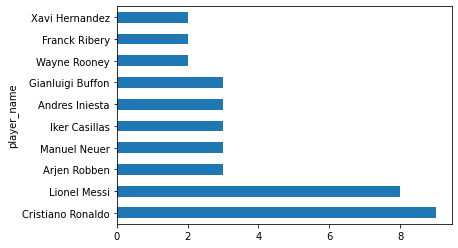

In [27]:
df_rank2['count'].plot(kind='barh')


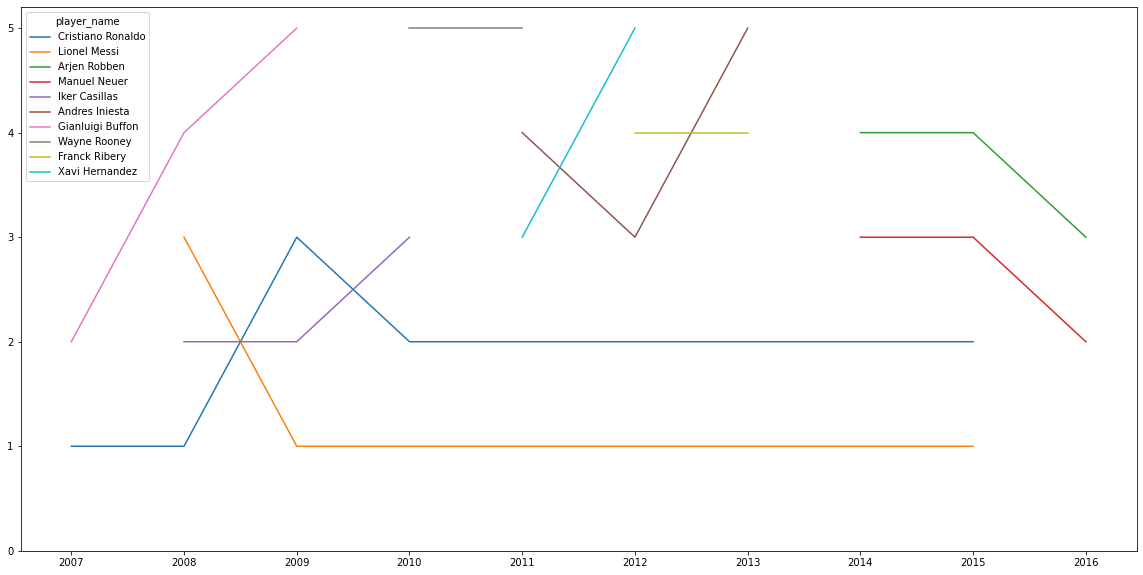

In [28]:
df_rank.plot(kind='line',figsize=(20,10))
plt.yticks(range(0,6))
plt.xticks(range(10),('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'),rotation=0)
plt.show()